In [1]:
import pickle
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [3]:
from matplotlib.colors import LinearSegmentedColormap

def get_grain_tick_labels2():

    """Returns a list of labels for a grain-type classification plot"""

    grain_tick_labels = ['',
                         'Rain',
                         'Ice\npellets',
                         'Freezing\nrain',
                         'Rain/Snow\nMix',
                         'Snow',
                         'Wet snow']

    return(grain_tick_labels)

def grain_type_colormap():

    """Returns a matplotlib colormap suitable for grain-type classification plots"""

    colors = [('white'),  # 1, precipitation particles
              ('green'),  # 2, Decomposing fragmented PP
              ('yellow'),  # 3 Rounded Grains (RG)
              ('orange'),  # 4 Faceted Crystals
              ('blue'),  # 5 Depth Hoar
              ('gray'),  # 6 Surface Hoar
              ('red'),  # 7 Melt FOrms
              ('cyan'),  # 8 Ice formations
              ('black'),  # 9 Rounded faceted particles
              ]


    cmap_name = 'grain_type_map'

    my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=9)

    return(my_cmap)

my_cmap = grain_type_colormap()

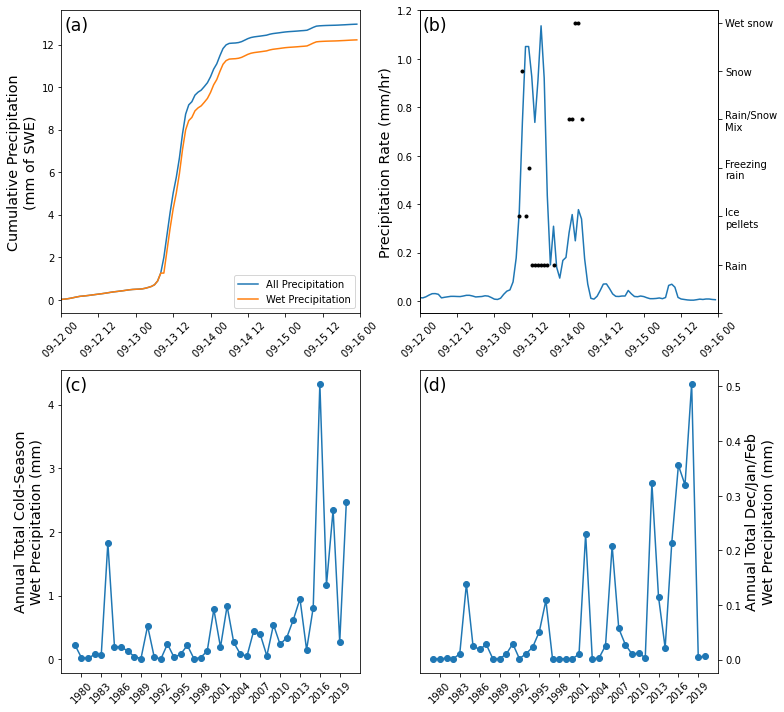

In [7]:
start, end, datetimes, v1, v2, type_series, prec_series = pickle.load(open('../pickles/event.p', 'rb'))

(years, sums_a_winter, sums_a_cs) = pickle.load(open('../pickles/trends.p', 'rb'))

fig, axs = plt.subplots(2,2,figsize=(11,10))

axr, ax, ax3, ax4 = axs.reshape(-1)

ax.plot(datetimes[start:end],prec_series[start:end])
ax.set_ylabel('Precipitation Rate (mm/hr)', fontsize='x-large')
ax.set_xlim(datetime.datetime(2020,9,12),datetime.datetime(2020,9,16))
ax.set_ylim(-0.05,1.2)
ax.tick_params('x',rotation=45)

ax2 = ax.twinx()

ax2.scatter(datetimes[start:end],type_series[start:end],color='k',marker='.')

ax2.set_yticks(np.arange(0,7))
ax2.set_yticklabels(get_grain_tick_labels2())


axr.plot(datetimes[start:end],np.cumsum(v1),label='All Precipitation')
axr.plot(datetimes[start:end],np.cumsum(v2),label='Wet Precipitation')

axr.set_ylabel('Cumulative Precipitation\n(mm of SWE)', fontsize='x-large')
axr.set_xlim(datetime.datetime(2020,9,12),datetime.datetime(2020,9,16))
axr.tick_params('x',rotation=45)
# axr.yaxis.tick_right()
# axr.yaxis.set_label_position("right")

axr.legend(loc='lower right')

#########

ax3.plot(years,sums_a_winter,marker='o',label='> 0.1 mm/day rate')
ax4.plot(years,sums_a_cs,marker='o',label='> 0.1 mm/day rate')

ax3.set_ylabel('Annual Total Cold-Season\nWet Precipitation (mm)',fontsize='x-large')
ax4.set_ylabel('Annual Total Dec/Jan/Feb\nWet Precipitation (mm)',fontsize='x-large')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")


ax3.set_xticks(list(years)[1::3])
ax3.set_xticklabels(list(years)[1::3],rotation=45)

ax4.set_xticks(list(years)[1::3])
ax4.set_xticklabels(list(years)[1::3],rotation=45)

for ax, letter in zip(axs.reshape(-1), ['a','b','c','d']):
    ax.annotate(text=f'({letter})',xy=(0.05,0.95),va='center',ha='center',fontsize='xx-large',xycoords='axes fraction')

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig('../figures/FigureS3.jpg',dpi=500,bbox_inches='tight')

plt.show()

In [23]:
years

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])